In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
dataset = pd.DataFrame(data.data, columns=data.feature_names)
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [9]:
xtrain, xtest = train_test_split(dataset, train_size=0.25,random_state=42)
sc=StandardScaler()
sc.fit(xtrain)

xtrain_std =sc.transform(xtrain)
xtest_std = sc.transform(xtest)

In [12]:
pca = PCA()
xtrain_pca = pca.fit_transform(xtrain_std)
exp_var_pca = pca.explained_variance_ratio_
cum_eigenvalues = np.cumsum(exp_var_pca)

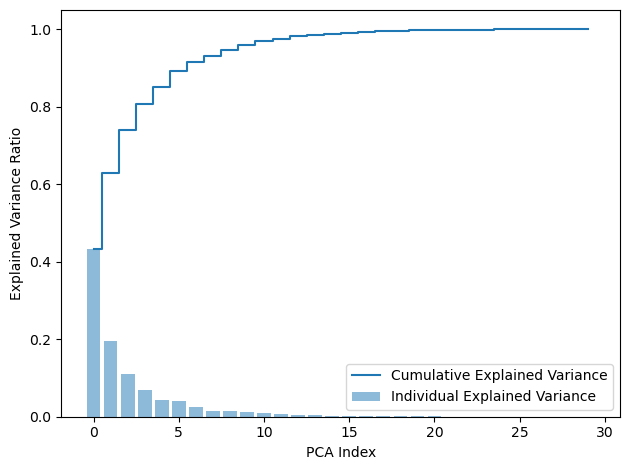

In [21]:
plt.bar(range(0, len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual Explained Variance')
plt.step(range(0, len(cum_eigenvalues)), cum_eigenvalues, where='mid', label='Cumulative Explained Variance')
plt.xlabel('PCA Index')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


In [22]:
pca.components_

array([[ 2.24115683e-01,  1.19760684e-01,  2.31857805e-01,
         2.25222121e-01,  1.29423279e-01,  2.31627917e-01,
         2.65941434e-01,  2.63773034e-01,  1.27022593e-01,
         3.65596502e-02,  2.00895149e-01,  4.37941912e-02,
         2.03480467e-01,  1.94455062e-01,  3.88439742e-02,
         1.55969581e-01,  1.95215486e-01,  1.84584255e-01,
         5.77386038e-02,  9.34360424e-02,  2.33557248e-01,
         1.15433627e-01,  2.42265274e-01,  2.31274570e-01,
         1.22184430e-01,  1.91804557e-01,  2.32033460e-01,
         2.48275088e-01,  9.92572537e-02,  1.18718724e-01],
       [-2.20819475e-01, -6.68027123e-03, -2.05558363e-01,
        -2.27179012e-01,  2.20905687e-01,  1.87729738e-01,
         1.81541990e-02, -4.19159153e-02,  2.14236176e-01,
         3.53016987e-01, -1.60431343e-01,  8.56056170e-02,
        -1.50448895e-01, -1.87102308e-01,  1.22536500e-01,
         2.26056116e-01,  1.20224680e-01,  7.69313178e-02,
         7.42499131e-02,  2.36952344e-01, -1.93254852e-